In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
import seaborn as sns
import pandas as pd
import os

from folder_paths import *

## Load fit parameters and scan infos

In [2]:
### LOAD FIT OUT ###

# get file names

g2_fit_files = os.listdir(g2fit_folder)
g2_fit_files.sort()
g2_fit_files = [f for f in g2_fit_files if f.startswith('g2fit_')]

# LOAD g2fit DATA
g2_fit = pd.DataFrame()
for f in g2_fit_files:
    df = pd.read_csv(os.path.join(g2fit_folder, f), comment='#')                                            # load data
    scan_number = f.split('_Q=')[0][6:]                                                                     # get scan number from file name (ex: g2fit_Ta2O5_2.5um_0002_0004_Q=2.0_dq=0.01 -> Ta2O5_2.5um_0002_0004)
    df.index = [scan_number] * len(df)                                                                      # add scan number as index
    g2_fit = pd.concat([g2_fit, df], axis=0)                                                                # append to g2_fit dataframe

g2_fit.index.name = 'scan'  # set index name to 'scan'
g2_fit['t'] = g2_fit['t'].round().astype(int)

### Add labels for plots

In [3]:
for i in g2_fit.index.unique():
    print('\''+i+'\': ,')

'Ta2O5_2.5um_0002_0004': ,
'Ta2O5_2.5um_0003_0009': ,
'Ta2O5_2.5um_B_0001_0002': ,
'Ta2O5_2.5um_B_0001_0003': ,
'Ta2O5_2.5um_asdep_0001_0006': ,
'Ta2O5_2.5um_asdep_0002_0001': ,
'Ta2O5_2.5um_asdep_0004_0001': ,
'Ta2O5_2.5um_asdep_0004_0002': ,
'Ta2O5_2.5um_asdep_0004_0005': ,
'Ta2O5_2.5um_asdep_0004_0006': ,
'Ta2O5_2.5um_asdep_0004_0007': ,
'Ta2O5_2.5um_asdep_0004_0009': ,
'Ta2O5_2.5um_asdep_0004_0013': ,


In [4]:
scan_info = [
    ['Ta2O5_2.5um_0002_0004',       'annealed (T~16h, *sb, *E_th=4keV)',                 10,   'ann'  , 1],
    ['Ta2O5_2.5um_0003_0009',       'annealed (T~6.5h, *E_th=4keV)',                     10,   'ann'  , 1],
    ['Ta2O5_2.5um_asdep_0001_0006', 'as-deposited (T~16h, *E_th=4keV)',                  10,   'asdep', 1],
    ['Ta2O5_2.5um_asdep_0002_0001', 'as-deposited (T~4.5h, *E_th=4keV)',                 1.7,  'asdep', 1],
    ['Ta2O5_2.5um_asdep_0002_0007', 'as-deposited (T~1h, *E_th=4keV)',                   6,    'asdep', 1],
    ['Ta2O5_2.5um_asdep_0004_0001', 'as-deposited (T~12 min)',                           10,   'asdep', 1],
    ['Ta2O5_2.5um_asdep_0004_0002', 'as-deposited (T~4.5h)',                             6,    'asdep', 1],
    ['Ta2O5_2.5um_asdep_0004_0005', 'as-deposited (T~5h)',                               1.7,  'asdep', 1],
    ['Ta2O5_2.5um_asdep_0004_0006', 'as-deposited (T~5h)',                               3.5,  'asdep', 1],
    ['Ta2O5_2.5um_asdep_0004_0007', 'as-deposited (T~5h)',                               8,    'asdep', 1],
    ['Ta2O5_2.5um_asdep_0004_0009', 'as-deposited (T~3h)',                               1.7,  'asdep', 1],
    ['Ta2O5_2.5um_asdep_0004_0013', 'as-deposited (T~20 min, att = 0.5)',                10,   'asdep', .5],
    ['Ta2O5_2.5um_B_0001_0002',     'annealed (T~6.5h, *E_th=4keV)',                     1.7,  'ann'  , 1],
]

scan_info_df = pd.DataFrame(scan_info, columns=['Nscan', 'scan_label', 'theta', 'type', 'att']).set_index('Nscan')
display(scan_info_df)

,scan_label,theta,type,att
Nscan,,,,
Ta2O5_2.5um_0002_0004,"annealed (T~16h, *sb, *E_th=4keV)",10.0,ann,1.0
Ta2O5_2.5um_0003_0009,"annealed (T~6.5h, *E_th=4keV)",10.0,ann,1.0
Ta2O5_2.5um_asdep_0001_0006,"as-deposited (T~16h, *E_th=4keV)",10.0,asdep,1.0
Ta2O5_2.5um_asdep_0002_0001,"as-deposited (T~4.5h, *E_th=4keV)",1.7,asdep,1.0
Ta2O5_2.5um_asdep_0002_0007,"as-deposited (T~1h, *E_th=4keV)",6.0,asdep,1.0
Ta2O5_2.5um_asdep_0004_0001,as-deposited (T~12 min),10.0,asdep,1.0
Ta2O5_2.5um_asdep_0004_0002,as-deposited (T~4.5h),6.0,asdep,1.0
Ta2O5_2.5um_asdep_0004_0005,as-deposited (T~5h),1.7,asdep,1.0
Ta2O5_2.5um_asdep_0004_0006,as-deposited (T~5h),3.5,asdep,1.0


## Load g2

In [179]:
%%HTML
g2_files = os.listdir(g2_folder)
g2_files.sort()
g2_files = [f for f in g2_files if f.startswith('g2_')]

t_g2, g2 = {}, {}
for f in g2_files:
    t_g2[f.split('_Q=')[0][3:]] = np.load(os.path.join(g2_folder, f), allow_pickle=True)['t_g2'].item()
    g2[f.split('_Q=')[0][3:]] = np.load(os.path.join(g2_folder, f), allow_pickle=True)['g2'].item()

# add to g2_fit dataframe
for scan in g2_fit.index.unique():
    g2_fit.loc[scan, 't_g2'] = t_g2[scan]
    g2_fit.loc[scan, 'g2'] = g2[scan]


# Dose dependence (constant Q)

In [ ]:
##########
Q = .33
##########

df2plot = g2_fit[g2_fit['Q'] == Q].copy()  # filter by Q

print('________________________________________')
print(' Possible Qs:')
print(g2_fit.Q.unique())
print('________________________________________')

________________________________________
 Possible Qs:
[2.    0.36  0.75  0.33  1.15  1.92  2.08  1.01  1.05  1.08  1.    1.12
 1.28  1.2   1.3   0.342 0.385 0.3   0.428 0.47  0.55  0.65  0.6   0.7
 0.8   1.45  1.55  1.5   1.65 ]
________________________________________


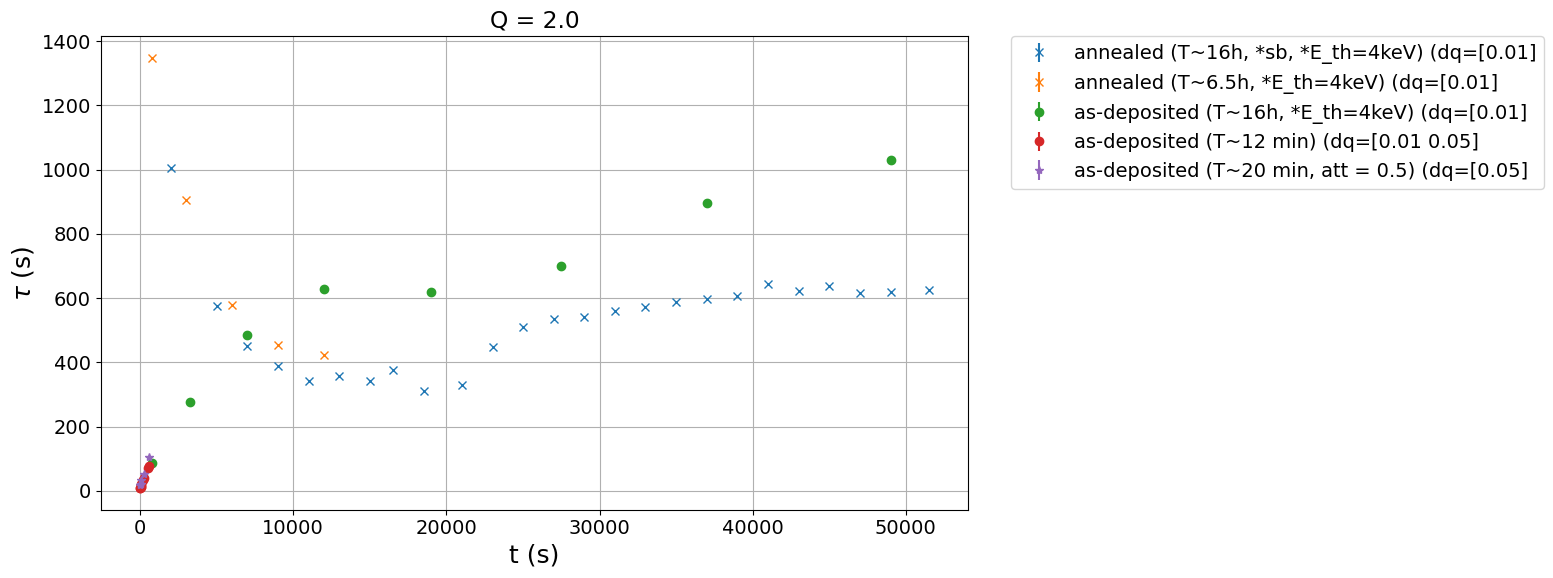

In [21]:
# tau plot -------------------------------------------------------

plt.figure(figsize=(10, 6))
plt.title(f'Q = {Q}')
for scan, group in df2plot.groupby(df2plot.index):
    if scan in scan_info_df.index:
        label = scan_info_df.loc[scan, 'scan_label']
        att = scan_info_df.loc[scan, 'att']
        typ = scan_info_df.loc[scan, 'type']

        # add (dq=X) at the end of the label (take it from df2plot)
        label += f' (dq={group["dQ"].unique()}'

        marker = 'x' if typ == 'ann' else 'o'
        if att != 1:
            marker = '*'
        plt.errorbar(group['t'], group['tau'], yerr=group['dtau'], fmt=marker, label=label)
    else:
        print(f'Scan {scan} not found in scan_info_df')

plt.xlabel('t (s)')
plt.ylabel(r'$\tau$ (s)')
#plt.xlim(0, 1000)
#plt.ylim(0, 300)
plt.grid()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


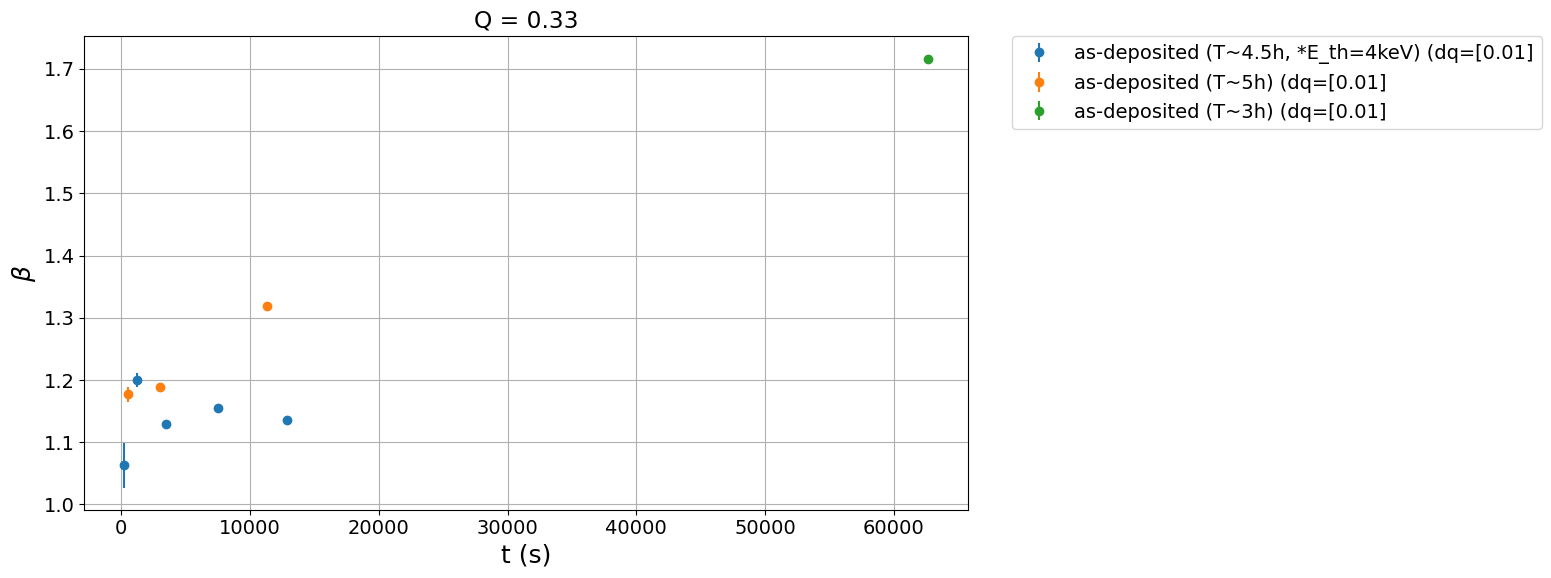

In [182]:
# beta plot -------------------------------------------------------

plt.figure(figsize=(10, 6))
plt.title(f'Q = {Q}')
for scan, group in df2plot.groupby(df2plot.index):
    if scan in scan_info_df.index:
        label = scan_info_df.loc[scan, 'scan_label']
        att = scan_info_df.loc[scan, 'att']
        typ = scan_info_df.loc[scan, 'type']

        # add (dq=X) at the end of the label (take it from df2plot)
        label += f' (dq={group["dQ"].unique()}'

        marker = 'x' if typ == 'ann' else 'o'
        if att != 1:
            marker = '*'
        plt.errorbar(group['t'], group['beta'], yerr=group['dbeta'], fmt=marker, label=label)
    else:
        print(f'Scan {scan} not found in scan_info_df')
plt.xlabel('t (s)')
plt.ylabel(r'$\beta$')
plt.grid()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

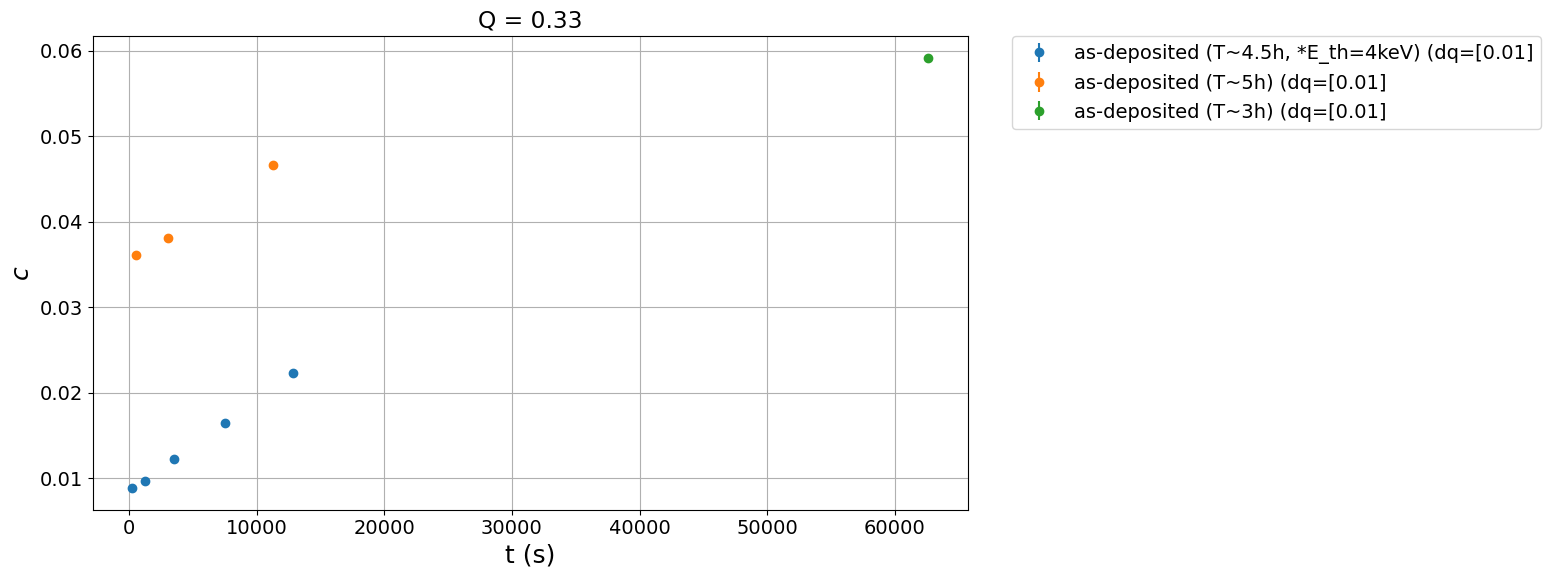

In [183]:
# c plot -------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.title(f'Q = {Q}')
for scan, group in df2plot.groupby(df2plot.index):
    if scan in scan_info_df.index:
        label = scan_info_df.loc[scan, 'scan_label']
        att = scan_info_df.loc[scan, 'att']
        typ = scan_info_df.loc[scan, 'type']

        # add (dq=X) at the end of the label (take it from df2plot)
        label += f' (dq={group["dQ"].unique()}'

        marker = 'x' if typ == 'ann' else 'o'
        if att != 1:
            marker = '*'
        plt.errorbar(group['t'], group['c'], yerr=group['dc'], fmt=marker, label=label)
    else:
        print(f'Scan {scan} not found in scan_info_df')
plt.xlabel('t (s)')
plt.ylabel(r'$c$')
plt.grid()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

## tau vs Q

In [13]:
df2plot['Q'==2]

KeyError: False

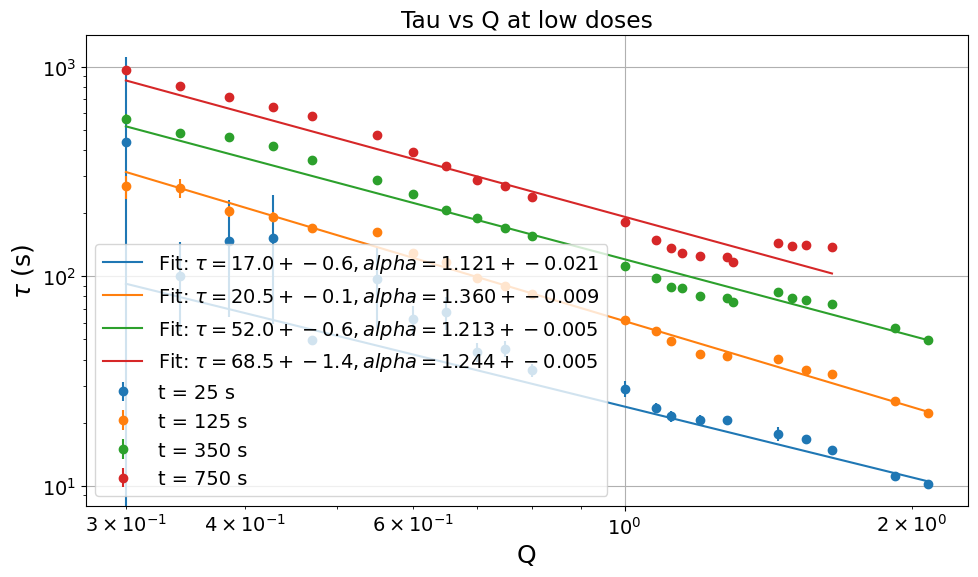

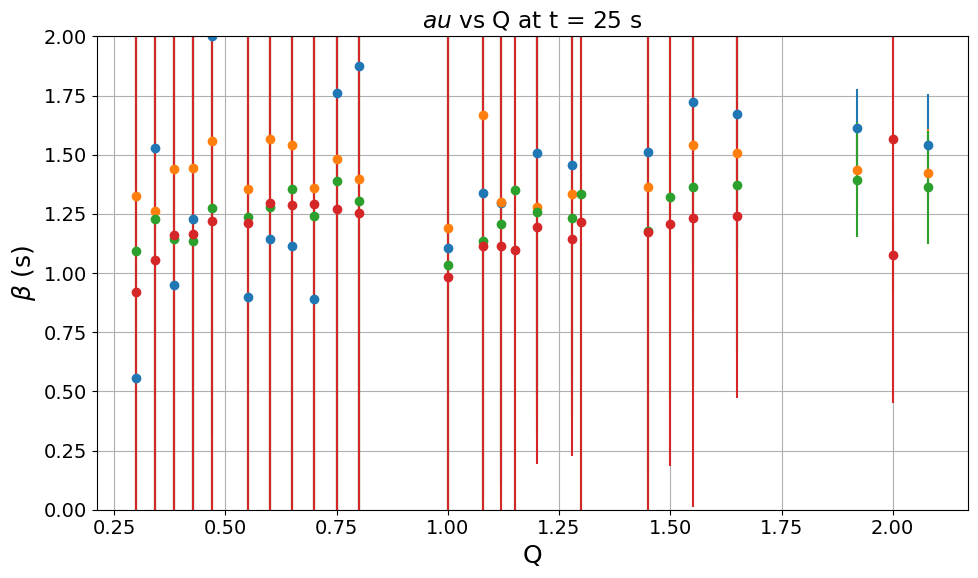

In [19]:
dose = 25
doses = [25, 125, 350, 750]

plt.figure(figsize=(10, 6))
for i, d in enumerate(doses):

    df2plot = g2_fit[g2_fit.t==d].copy()
    if d == 750:
        df2plot = df2plot[df2plot['Q'] < 1.75]
    plt.errorbar(df2plot['Q'], df2plot['tau'], yerr=df2plot['dtau'], fmt='o', label=f't = {d} s')
    
    from scipy.optimize import curve_fit
    def fit_func(Q, a, alpha):
        return (a / Q)**alpha
    mask = df2plot['Q'] <2

    popt, pcov = curve_fit(fit_func, df2plot['Q'], df2plot['tau'], sigma=df2plot['dtau'], absolute_sigma=True, maxfev=10000, bounds=(0, [np.inf, 5]))
    df2plot['fit_tau'] = fit_func(df2plot['Q'], *popt)
    x = np.linspace(df2plot['Q'].min(), df2plot['Q'].max(), 100)
    y = fit_func(x, *popt)
    plt.plot(x, y, c = 'C'+str(i), label=f'Fit: $\\tau = {popt[0]:.1f}+- {pcov[0,0]:.1f}, alpha = {popt[1]:.3f}+- {np.sqrt(pcov[1, 1]):.3f}$')

plt.xlabel('Q')
plt.ylabel(r'$\tau$ (s)')
plt.title(f'Tau vs Q at low doses')
plt.grid()
#plt.xlim(0)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for d in doses:
    df2plot = g2_fit[g2_fit.t==d].copy()
    plt.errorbar(df2plot['Q'], df2plot['beta'], yerr=df2plot['dtau'], fmt='o')
plt.xlabel('Q')
plt.ylabel(r'$\beta$ (s)')
plt.title(f'$\tau$ vs Q at t = {dose} s')
plt.grid()
plt.ylim(0,2)
plt.tight_layout()
plt.show()

### Attenuators comparison

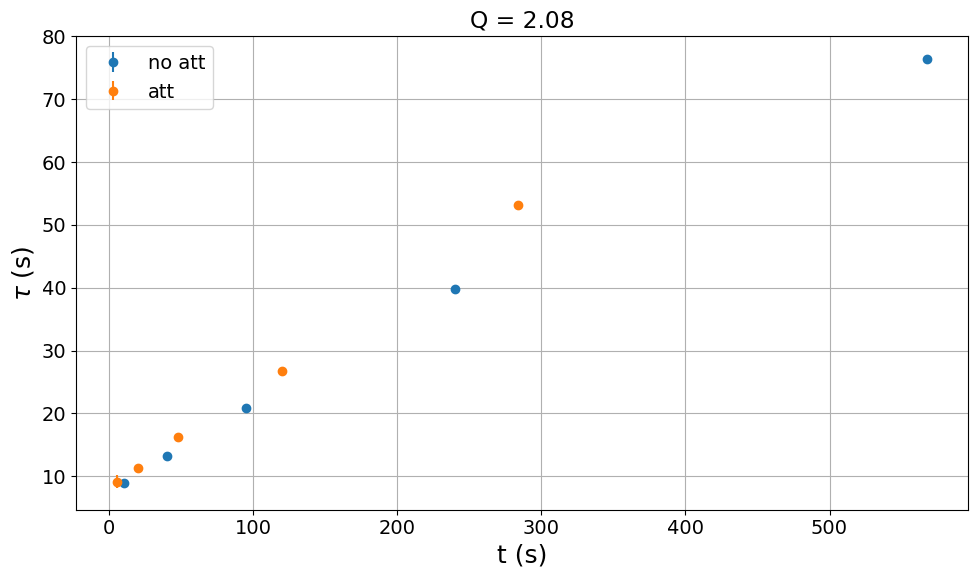

In [187]:
#################################
idx_1 = 'Ta2O5_2.5um_asdep_0004_0001'
idx_2 = 'Ta2O5_2.5um_asdep_0004_0013'

g2_fit_att = g2_fit[g2_fit['dQ'] == 0.05]

plt.figure(figsize=(10, 6))
plt.errorbar(g2_fit_att.loc[idx_1]['t'], g2_fit_att.loc[idx_1]['tau'], yerr = g2_fit_att.loc[idx_1]['dtau'], fmt='o', label='no att')
plt.errorbar(g2_fit_att.loc[idx_2]['t']/2, g2_fit_att.loc[idx_2]['tau']/2, yerr = g2_fit_att.loc[idx_2]['dtau'], fmt='o', label='att')

plt.title(f'Q = {Q}')
plt.xlabel('t (s)')
plt.ylabel(r'$\tau$ (s)')
plt.legend(); plt.grid()
plt.tight_layout(); plt.show()

## g2 plots

IndexError: list index out of range

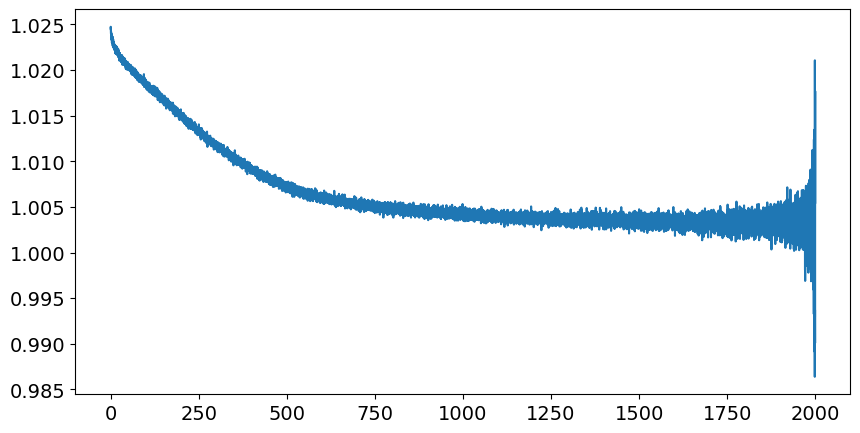

In [188]:
#########################
idx_1 = 5
idx_2 = 5
idx_3 = 5
#########################
plt.figure(figsize=(10,5))

x, y ,t =  list(t_g2['Ta2O5_2.5um_0002_0004'].values())[idx_1], list(g2['Ta2O5_2.5um_0002_0004'].values())[idx_1], list(t_g2['Ta2O5_2.5um_0002_0004'].keys())[idx_1]
plt.plot(x, y,     label='Ta2O5, 2.5um, annealed (sample before) @ '+str(t)+' s')
x, y, t =  list(t_g2['Ta2O5_2.5um_0003_0009'].values())[idx_2], list(g2['Ta2O5_2.5um_0003_0009'].values())[idx_2], list(t_g2['Ta2O5_2.5um_0003_0009'].keys())[idx_2]
plt.plot(x, y,     label='Ta2O5, 2.5um, annealed (sample after) @ '+str(t)+' s')
x, y, t =  list(t_g2['Ta2O5_2.5um_asdep_0001_0006'].values())[idx_3], list(g2['Ta2O5_2.5um_asdep_0001_0006'].values())[idx_3], list(t_g2['Ta2O5_2.5um_asdep_0001_0006'].keys())[idx_3]
plt.plot(x, y,     label='Ta2O5, 2.5um, as-deposited (sample after) @ '+str(t)+' s')

plt.xlabel(r't [s]')
plt.ylabel(r'$g_2$')
plt.legend()
plt.xscale('log')
plt.ylim(1.0,1.03)
plt.tight_layout(), plt.show();